In [1]:
#importing important libraries

In [2]:
from math import sqrt
from keras.layers import LSTM
from keras.layers import merge, Input, Dense, TimeDistributed, Lambda                                   
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from keras import optimizers
#from keras import activation
from keras.layers import Dense, Softmax, Dropout
from keras.layers import Activation, Dense



/home/phillemon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:

# loading concatinated data from the drive for station 13
import pandas as pd
wm0013=pd.read_csv('wm013.csv')
wm0014=pd.read_csv('wind14 (1).csv')

/home/phillemon/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# dropping the station id and date time to be able yo interpolate

Droped1=wm0014.drop(columns=[' Station_ID', 'date_time'])

two=Droped1.replace(to_replace=' NULL', value=np.nan)

In [7]:
# dropping the station id and date time to be able yo interpolate

Droped2=wm0013.drop(columns=[' Station_ID', 'date_time'])

one=Droped2.replace(to_replace=' NULL', value=np.nan)

In [8]:
# interpolation of the data 
interpolated1=one.interpolate(method='linear')
interpolated1.head()

WS_62_mean   WS_62_min   WS_62_max   WS_62_stdv   WS_60_mean   WS_60_min  \
0       4.1629      3.6380      4.5697       0.1776       4.0932      3.6295   
1       4.0387      3.6380      4.8803       0.2149       3.9846      3.6295   
2       3.7964      3.3274      4.2592       0.1745       3.7462      3.3191   
3       4.0927      3.6380      4.5697       0.1627       4.0783      3.9399   
4       4.1275      3.9486      4.5697       0.1553       4.0969      3.9399   

    WS_60_max   WS_60_stdv   WS_40_mean   WS_40_min ...   Tgrad_stdv  \
0      4.5606       0.1856       3.2474      3.0066 ...        0.033   
1      4.5606       0.2080       3.3663      3.0066 ...        0.039   
2      4.2503       0.1775       3.6693      3.0066 ...        0.052   
3      4.2503       0.1546       4.0395      3.6288 ...        0.057   
4      4.2503       0.1552       4.0756      3.6288 ...        0.030   

    Pbaro_mean   Pbaro_min   Pbaro_max   Pbaro_stdv   RH_mean   RH_min  \
0      1009.28     1009.04     1009.52       0.0917      95.5     94.1   
1      1009.04     1009.04     1009.28       0.0720      95.6     94.3   
2      1009.04     1008.80     1009.28       0.0869      95.7     94.5   
3      1008.80     1008.80     1009.04       0.0850      96.3     94.8   
4      1008.80     1008.80     1009.04       0.0782      96.2     94.9   

    RH_max   RH_stdv     
0     98.7     1.245     
1     98.8     1.136     
2     99.1     1.093     
3     99.4     1.191     
4     99.4     1.104     

[5 rows x 45 columns]

In [9]:
# checking if the interpolated dat frame has nulls by summing over the entire nulls

interpolated1.dropna(inplace=True)

In [10]:
interpolated1.isnull().sum().sum()

0

In [11]:
# interpolation of the data 
interpolated2=two.interpolate(meathod='linear')
interpolated2.head()

WS_62_mean   WS_62_min   WS_62_max   WS_62_stdv   WS_60_mean   WS_60_min  \
0       8.1984      6.4415      9.2352       0.6022       8.2188      6.7425   
1       8.1053      6.4415      9.8561       0.7525       8.1196      6.4323   
2       8.7696      7.0623      9.8561       0.6072       8.7834      7.0526   
3       8.9869      7.6831     10.1665       0.4774       9.0129      7.3628   
4       8.7696      7.3727      9.8561       0.4284       8.8082      7.6730   

    WS_60_max   WS_60_stdv   WS_40_mean   WS_40_min    ...      Tgrad_max  \
0      9.5340       0.6098       7.3425      5.8101    ...          1.143   
1     10.1543       0.7425       7.2618      5.4998    ...          0.928   
2      9.8441       0.6005       7.6775      6.4305    ...          1.143   
3     10.1543       0.5006       7.9133      6.7407    ...          1.143   
4      9.8441       0.4349       7.8078      6.7407    ...          1.143   

    Tgrad_stdv   Pbaro_mean   Pbaro_min   Pbaro_max   Pbaro_stdv   RH_mean  \
0        0.189       800.72      800.72      801.20       0.1037     37.47   
1        0.115       800.72      800.48      800.96       0.0864     37.90   
2        0.134       800.72      800.48      800.96       0.0653     38.57   
3        0.071       800.72      800.24      800.96       0.0696     38.21   
4        0.092       800.72      800.48      800.72       0.0631     37.71   

    RH_min   RH_max   RH_stdv  
0    36.77    39.02    0.4860  
1    36.84    39.63    0.6227  
2    37.83    39.90    0.4891  
3    37.15    39.63    0.5211  
4    37.01    39.09    0.5091  

[5 rows x 44 columns]

In [12]:
# checking if the interpolated dat frame has nulls by summing over the entire nulls
interpolated2.isnull().sum().sum()

0

In [13]:
Station13 =pd.concat( [wm0013['date_time'],wm0013[' Station_ID'],interpolated1], axis=1)

In [14]:
Station14 =pd.concat( [wm0014['date_time'],wm0014[' Station_ID'],interpolated2], axis=1)

In [15]:
# converting time to 1 hour
# converting 10 min time interval data in to hours

In [16]:
num_hour1 = [i for i in range(5,len(Station13),6)]
num_hour2 = [i for i in range(5,len(Station14),6)]

In [17]:
result_hour1 = wm0013.iloc[num_hour1]
result_hour2 = wm0014.iloc[num_hour2]

In [18]:
Sta13 =result_hour1.reset_index(drop=True)
Sta14 =result_hour2.reset_index(drop=True)

In [19]:
Sta13.head(2)

date_time  Station_ID   WS_62_mean   WS_62_min   WS_62_max  \
0  2017-07-01 01:00:00        WM13       4.2952      3.9486      4.5697   
1  2017-07-01 02:00:00        WM13       3.7032      3.3274      4.5697   

    WS_62_stdv   WS_60_mean   WS_60_min   WS_60_max   WS_60_stdv ...  \
0       0.1615       4.2583      3.9399      4.5606       0.1558 ...   
1       0.3516       3.6493      3.0087      4.5606       0.3526 ...   

    Tgrad_stdv   Pbaro_mean   Pbaro_min   Pbaro_max   Pbaro_stdv   RH_mean  \
0        0.034      1008.80     1008.56     1009.04       0.0701      96.2   
1        0.064      1008.56     1008.32     1008.80       0.0746      98.8   

    RH_min   RH_max   RH_stdv     
0     95.0     99.6     1.145     
1     97.4    100.0     1.293     

[2 rows x 47 columns]

In [20]:
Sta14.head(2)

date_time  Station_ID   WS_62_mean   WS_62_min   WS_62_max  \
0  2017-07-01 01:00:00        WM14       8.2978      7.0623      9.8561   
1  2017-07-01 02:00:00        WM14       7.9687      6.4415      9.2352   

    WS_62_stdv   WS_60_mean   WS_60_min   WS_60_max   WS_60_stdv    ...     \
0       0.5631       8.3119      7.0526       9.534       0.5670    ...      
1       0.5619       7.9769      6.4323       9.534       0.5695    ...      

    Tgrad_max   Tgrad_stdv   Pbaro_mean   Pbaro_min   Pbaro_max   Pbaro_stdv  \
0       1.143        0.171       800.72      800.48      800.96       0.0670   
1       1.143        0.090       800.48      800.24      800.72       0.0857   

    RH_mean   RH_min   RH_max   RH_stdv  
0     38.17    37.35    39.67    0.4954  
1     39.08    38.17    40.65    0.5266  

[2 rows x 46 columns]

In [21]:
# creating a data frame with features of intrest
WS_means13=Sta14.loc[:, [' WS_60_mean']][:17319]
WS_mean60=Sta13.loc[:, [ ' WS_40_mean',' Tair_mean',' RH_mean']]
WS_mean60.head()

WS_40_mean   Tair_mean   RH_mean
0       3.8889       17.28      96.2
1       2.9830       16.25      98.8
2       3.9754       16.32      99.4
3       2.4062       15.89      96.9
4       2.6986       16.00      95.1

In [62]:
# creating a data frame with features of intrest
WS_means14=Sta14.loc[:, [ ' WS_60_mean'] and [' WS_40_mean'] ]
len(WS_means14)

17319

In [63]:
from sklearn import preprocessing

In [64]:
WS_means14.dropna(inplace=True)

In [65]:
def scale(wind_name, normalize=True):

    df  =pd.DataFrame(WS_means14)
    if normalize:        
        min_max_scaler = preprocessing.MinMaxScaler()
        #df[' WS_60_min'] = min_max_scaler.fit_transform(df[' WS_60_min'].values.reshape(-1,1))
        #df[' WS_60_max'] = min_max_scaler.fit_transform(df[' WS_60_max'].values.reshape(-1,1))
        #df[' WS_60_stdv'] = min_max_scaler.fit_transform(df[' WS_60_stdv'].values.reshape(-1,1))
        df[' WS_60_mean'] = min_max_scaler.fit_transform(df[' WS_60_mean'].values.reshape(-1,1))
        df[' WS_40_mean'] = min_max_scaler.fit_transform(df[' WS_40_mean'].values.reshape(-1,1))

    return df

In [66]:
WS_means14 = scale(WS_means14, normalize=True)

KeyError: ' WS_60_mean'

In [67]:
# head  of features
WS_means14.shape[-1]

1

In [61]:

# function to create train, validation, test data given stock data and sequence length
def load_data(wind_data,seq_len):
    data_raw = wind_data.as_matrix() # convert to numpy array for all features
    data = []
    valid_set_size_percentage = 0.10 
    test_set_size_percentage = 0.10
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    # This is applied on the training data
    data = np.array(data);
    valid_set_size = int(round(valid_set_size_percentage * data.shape[0])) #int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage  *data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
 
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1][:,-1]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1][:,-1]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1][:,-1]
    
    return [x_train,y_train, x_valid,y_valid, x_test, y_test]

In [46]:
seq_len = 24
x_train,y_train, x_valid,y_valid, x_test, y_test = load_data(WS_means13,seq_len)

/home/phillemon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [47]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)


x_train.shape =  (13836, 23, 1)
y_train.shape =  (13836,)
x_valid.shape =  (1729, 23, 1)
y_valid.shape =  (1729,)
x_test.shape =  (1729, 23, 1)
y_test.shape =  (1729,)


In [51]:
y_train

array([0.14424994, 0.14535947, 0.13583539, ..., 0.12282523, 0.18205994,
       0.22202457])

In [39]:
model = Sequential()
model.add(LSTM(100, return_sequences=True,input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))# returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True)) 
#moedl.add(Dropout(0.5))# returns a sequence of vectors of dimension 32
model.add(LSTM(32, activation='sigmoid'))  # return a single vector of dimension 32
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 23, 100)           40800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 23, 100)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 23, 32)            17024     
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 66,177
Trainable params: 66,177
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(x_train, y_train, epochs=15, batch_size=200, validation_data=(x_valid, y_valid), verbose=1, shuffle=False)

Train on 13836 samples, validate on 1729 samples
Epoch 1/15
13836/13836 [==============================] - 30s 2ms/step - loss: 0.0187 - acc: 2.8910e-04 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 2/15
13836/13836 [==============================] - 23s 2ms/step - loss: 0.0111 - acc: 2.8910e-04 - val_loss: 0.0071 - val_acc: 0.0000e+00
Epoch 3/15
13836/13836 [==============================] - 24s 2ms/step - loss: 0.0080 - acc: 3.6138e-04 - val_loss: 0.0052 - val_acc: 0.0000e+00
Epoch 4/15
13836/13836 [==============================] - 23s 2ms/step - loss: 0.0067 - acc: 3.6138e-04 - val_loss: 0.0046 - val_acc: 0.0000e+00
Epoch 5/15
13836/13836 [==============================] - 27s 2ms/step - loss: 0.0059 - acc: 3.6138e-04 - val_loss: 0.0041 - val_acc: 0.0000e+00
Epoch 6/15
13836/13836 [==============================] - 28s 2ms/step - loss: 0.0052 - acc: 3.6138e-04 - val_loss: 0.0037 - val_acc: 0.0000e+00
Epoch 7/15
13836/13836 [==============================] - 23s 2ms/step - loss: 0.

In [41]:
train_loss = history.history['loss']
vlid_loss=history.history['val_loss']

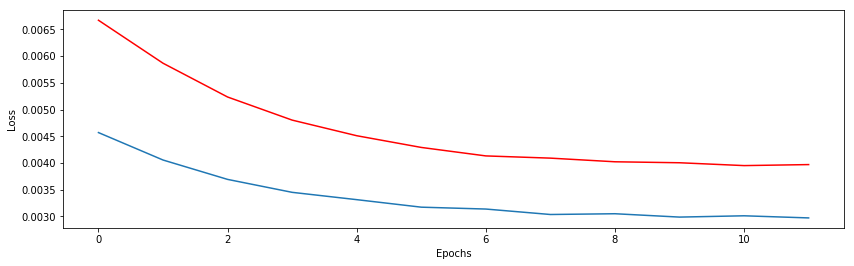

In [42]:
pyplot.figure(figsize = (14,4))
pyplot.plot(train_loss[3:], color='red')
pyplot.plot(vlid_loss[3:])
pyplot.xlabel("Epochs")
pyplot.ylabel("Loss")
pyplot.show()

In [43]:
Pred_test = model.predict(x_test)

In [48]:
# make a prediction
predicted = model.predict(x_test)
x_test= x_test.reshape((x_test.shape[0], seq_len*1))
# invert scaling for forecast
inv_predicted = concatenate((predicted, x_test[:, -4+1:]), axis=1)
inv_predicted = scaler.inverse_transform(inv_predicted)
inv_predicted = inv_predicted[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(y_test), 1))
inv_y = concatenate((y_test, y_test[:, -4+1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_predicted))
print('Test RMSE: %.3f' % rmse)


ValueError: cannot reshape array of size 39767 into shape (1729,24)

In [44]:
y_test = np.reshape(y_test,(y_test.shape[0], 1))
Pred_test.shape, y_test.shape

((1729, 1), (1729, 1))

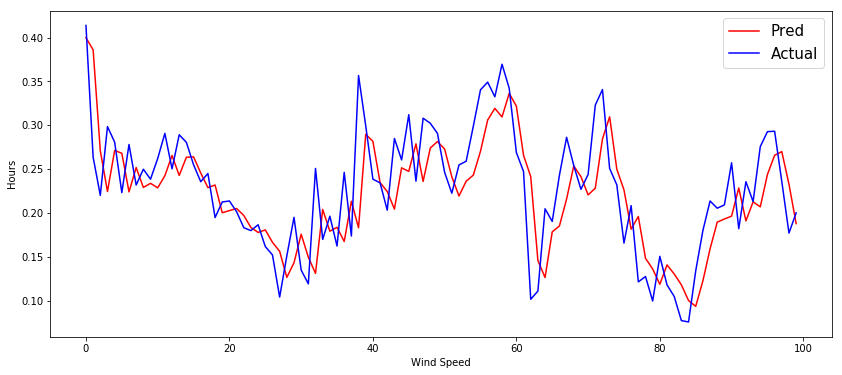

In [45]:
pyplot.figure(figsize = (14,6))
pyplot.plot(Pred_test[-100:], color='red', label='Pred')
pyplot.plot(y_test[-100:], color='blue', label='Actual')
pyplot.xlabel("Wind Speed")
pyplot.ylabel("Hours")
pyplot.legend(fontsize=15)
pyplot.show()

## pyplot.figure(figsize = (14,4))
pyplot.plot(Pred_test, color='blue', label='Pred')
pyplot.plot(y_test, color='red', label='Actual')
pyplot.xlabel("Wind Speed")
pyplot.ylabel("Hours")
pyplot.show()

In [46]:
testScore = np.sqrt(mean_squared_error(Pred_test[:1000], y_test[:1000]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 0.07 RMSE


In [44]:

d'''''ef create_symbol(model_name='LSTM', units=16, activation='linear', time_ahead=1):
    model = Sequential()
    if model_name == 'LSTM':
        model.add(LSTM(units, input_shape=(10, time_ahead)))
    elif model_name == 'BiLSTM':
        model.add(Bidirectional(LSTM(units), input_shape=(10, time_ahead)))
    elif model_name == 'GRU':
        model.add(GRU(units, input_shape=(10, time_ahead)))
    else:
        raise ValueError("Wrong model name")
    model.add(Dense(1))
    model.add(Activation('linear'))
    return model
TIME_AHEAD = 4
model = create_symbol(model_name='LSTM', units=16,activation='linear', time_ahead=TIME_AHEAD)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])'''''